## import data from database

In [2]:
import os
import xarray as xr
import geopandas as gpd  # type: ignore

from dotenv import load_dotenv
import sqlalchemy as sq
import sys
import pandas as pd
import matplotlib.pyplot as plt  # type: ignore

sys.path.append("../Shared/")
from DataService import DataService  # type: ignore

/home/student/anghandk/.local/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/tmp/ipykernel_3568310/1057841555.py:3: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using Py

In [3]:
load_dotenv()
PG_USER = os.getenv("POSTGRES_USER")
PG_PW = os.getenv("POSTGRES_PW")
PG_DB = os.getenv("POSTGRES_DB")
PG_ADDR = os.getenv("POSTGRES_ADDR")
PG_PORT = os.getenv("POSTGRES_PORT")

In [4]:
# connicting to database
db = DataService(PG_DB, PG_ADDR, PG_PORT, PG_USER, PG_PW)
conn = db.connect()

In [5]:
query = sq.text("select * FROM public.ab_station_data")
ab_df = pd.read_sql(query, conn)

In [10]:
query = sq.text("select * FROM public.mb_station_data")
mb_df = pd.read_sql(query, conn)

In [11]:
query = sq.text("select * FROM public.sk_station_data")
sk_df = pd.read_sql(query, conn)

In [12]:
ab_df.head()

,station_id,date,year,month,day,max_temp,min_temp,mean_temp,total_rain,total_snow,total_precip,snow_on_grnd
0,3010010,2022-12-01,2022,12,1,-20.3,-32.1,-26.2,0.0,0.0,0.0,0.0
1,3010010,2022-12-02,2022,12,2,-21.0,-35.7,-28.3,0.0,0.0,0.0,0.0
2,3010010,2022-12-03,2022,12,3,-5.5,-30.0,-17.7,0.0,0.0,0.0,0.0
3,3010010,2022-12-04,2022,12,4,-3.1,-15.9,-9.5,0.0,0.0,0.0,0.0
4,3010010,2022-12-05,2022,12,5,-15.6,-27.9,-21.7,0.0,0.0,0.0,0.0


In [13]:
mb_df.head()

,station_id,date,year,month,day,max_temp,min_temp,mean_temp,total_rain,total_snow,total_precip,snow_on_grnd
0,5040131,2010-10-02,2010,10,2,14.4,6.1,10.3,0.0,0.0,0.0,0.0
1,5040131,2010-10-03,2010,10,3,15.7,8.7,12.2,0.0,0.0,0.0,0.0
2,5040131,2010-10-04,2010,10,4,16.5,10.5,13.5,0.0,0.0,0.0,0.0
3,5040131,2010-10-05,2010,10,5,19.2,10.3,14.8,0.0,0.0,0.0,0.0
4,5040131,2010-10-06,2010,10,6,20.5,7.8,14.2,0.0,0.0,0.0,0.0


In [14]:
sk_df.head()

,station_id,date,year,month,day,max_temp,min_temp,mean_temp,total_rain,total_snow,total_precip,snow_on_grnd
0,4020286,2022-12-01,2022,12,1,-8.9,-19.4,-14.2,0.0,0.0,1.5,5.0
1,4020286,2022-12-02,2022,12,2,-19.3,-25.8,-22.6,0.0,0.0,0.2,10.0
2,4020286,2022-12-03,2022,12,3,-11.3,-23.0,-17.1,0.0,0.0,0.0,11.0
3,4020286,2022-12-04,2022,12,4,-4.8,-12.1,-8.4,0.0,0.0,0.0,8.0
4,4020286,2022-12-05,2022,12,5,-8.2,-16.8,-12.5,0.0,0.0,0.2,4.0


In [31]:
ab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1931775 entries, 0 to 1931774
Data columns (total 12 columns):
 #   Column        Dtype         
---  ------        -----         
 0   station_id    object        
 1   date          datetime64[ns]
 2   year          int64         
 3   month         int64         
 4   day           int64         
 5   max_temp      float64       
 6   min_temp      float64       
 7   mean_temp     float64       
 8   total_rain    float64       
 9   total_snow    float64       
 10  total_precip  float64       
 11  snow_on_grnd  float64       
dtypes: datetime64[ns](1), float64(7), int64(3), object(1)
memory usage: 176.9+ MB


In [16]:
mb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684983 entries, 0 to 684982
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   station_id    684983 non-null  object        
 1   date          684983 non-null  datetime64[ns]
 2   year          684983 non-null  int64         
 3   month         684983 non-null  int64         
 4   day           684983 non-null  int64         
 5   max_temp      684983 non-null  float64       
 6   min_temp      684983 non-null  float64       
 7   mean_temp     684983 non-null  float64       
 8   total_rain    684983 non-null  float64       
 9   total_snow    684983 non-null  float64       
 10  total_precip  684983 non-null  float64       
 11  snow_on_grnd  684983 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(3), object(1)
memory usage: 62.7+ MB


In [17]:
sk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924353 entries, 0 to 924352
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   station_id    924353 non-null  object        
 1   date          924353 non-null  datetime64[ns]
 2   year          924353 non-null  int64         
 3   month         924353 non-null  int64         
 4   day           924353 non-null  int64         
 5   max_temp      924353 non-null  float64       
 6   min_temp      924353 non-null  float64       
 7   mean_temp     924353 non-null  float64       
 8   total_rain    924353 non-null  float64       
 9   total_snow    924353 non-null  float64       
 10  total_precip  924353 non-null  float64       
 11  snow_on_grnd  924353 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(3), object(1)
memory usage: 84.6+ MB


In [8]:
ab_df.describe()

,date,year,month,day,max_temp,min_temp,mean_temp,total_rain,total_snow,total_precip,snow_on_grnd
count,1931775,1.931775e+06,1.931775e+06,1.931775e+06,1.931775e+06,1.931775e+06,1.931775e+06,1.931775e+06,1.931775e+06,1.931775e+06,1.931775e+06
mean,2002-02-25 02:34:13.524866560,2.001649e+03,6.564118e+00,1.574447e+01,9.489220e+00,-3.020935e+00,3.239889e+00,3.225538e-01,1.252362e-01,1.005055e+00,2.195590e+00
min,1881-10-26 00:00:00,1.881000e+03,1.000000e+00,1.000000e+00,-4.440000e+01,-5.220000e+01,-4.830000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1998-04-29 00:00:00,1.998000e+03,4.000000e+00,8.000000e+00,9.000000e-01,-1.000000e+01,-4.600000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2010-01-22 00:00:00,2.010000e+03,7.000000e+00,1.600000e+01,1.080000e+01,-1.200000e+00,4.900000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2016-12-11 00:00:00,2.016000e+03,1.000000e+01,2.300000e+01,2.010000e+01,6.200000e+00,1.320000e+01,0.000000e+00,0.000000e+00,4.000000e-01,0.000000e+00
max,2022-12-31 00:00:00,2.022000e+03,1.200000e+01,3.100000e+01,4.280000e+01,2.630000e+01,3.250000e+01,1.284000e+02,5.760000e+01,1.800000e+02,1.320000e+02
std,NaN,2.331777e+01,3.444255e+00,8.799829e+00,1.314522e+01,1.162987e+01,1.215208e+01,2.218248e+00,9.087223e-01,3.492054e+00,7.876043e+00


In [19]:
mb_df.describe()

,date,year,month,day,max_temp,min_temp,mean_temp,total_rain,total_snow,total_precip,snow_on_grnd
count,684983,684983.000000,684983.000000,684983.000000,684983.000000,684983.000000,684983.000000,684983.000000,684983.000000,684983.000000,684983.000000
mean,1998-01-16 02:35:03.303585664,1997.541813,6.537889,15.731907,6.187498,-4.661616,0.765487,0.600898,0.215455,1.213462,5.581216
min,1938-01-04 00:00:00,1938.000000,1.000000,1.000000,-40.000000,-49.400000,-43.100000,0.000000,0.000000,0.000000,0.000000
25%,1985-12-10 00:00:00,1985.000000,4.000000,8.000000,-5.300000,-15.600000,-10.400000,0.000000,0.000000,0.000000,0.000000
50%,2002-12-09 00:00:00,2002.000000,7.000000,16.000000,7.000000,-2.100000,2.500000,0.000000,0.000000,0.000000,0.000000
75%,2013-05-02 00:00:00,2013.000000,10.000000,23.000000,19.500000,7.300000,13.400000,0.000000,0.000000,0.400000,0.000000
max,2022-12-31 00:00:00,2022.000000,12.000000,31.000000,41.300000,25.100000,31.400000,303.000000,60.000000,303.000000,148.000000
std,NaN,19.477196,3.452933,8.801089,15.238056,14.454217,14.660538,3.193125,1.206760,4.165617,13.487690


In [20]:
sk_df.describe()

,date,year,month,day,max_temp,min_temp,mean_temp,total_rain,total_snow,total_precip,snow_on_grnd
count,924353,924353.000000,924353.000000,924353.000000,924353.000000,924353.000000,924353.000000,924353.000000,924353.000000,924353.000000,924353.000000
mean,1990-12-27 03:56:58.214902784,1990.487070,6.531193,15.730415,8.000697,-4.154620,1.927026,0.520321,0.182710,1.027881,3.822943
min,1883-12-01 00:00:00,1883.000000,1.000000,1.000000,-47.200000,-52.600000,-48.100000,0.000000,0.000000,0.000000,0.000000
25%,1977-08-17 00:00:00,1977.000000,4.000000,8.000000,-2.800000,-13.000000,-7.800000,0.000000,0.000000,0.000000,0.000000
50%,1999-05-11 00:00:00,1999.000000,7.000000,16.000000,9.400000,-2.000000,3.800000,0.000000,0.000000,0.000000,0.000000
75%,2011-10-25 00:00:00,2011.000000,10.000000,23.000000,20.600000,6.800000,13.700000,0.000000,0.000000,0.300000,0.000000
max,2022-12-31 00:00:00,2022.000000,12.000000,31.000000,43.300000,27.200000,32.800000,192.800000,47.800000,192.800000,420.000000
std,NaN,27.980299,3.455233,8.798306,14.750140,13.284542,13.809690,2.812864,1.035287,3.620737,10.254643


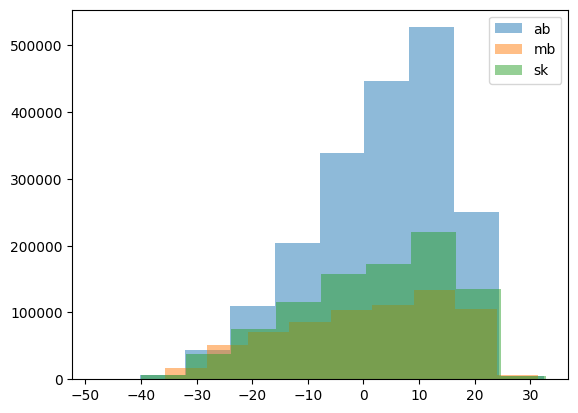

In [21]:
plt.hist(ab_df['mean_temp'], alpha=0.5, label="ab")
plt.hist(mb_df['mean_temp'], alpha=0.5, label="mb")
plt.hist(sk_df['mean_temp'], alpha=0.5, label="sk")
plt.legend(loc="upper right")
plt.show()

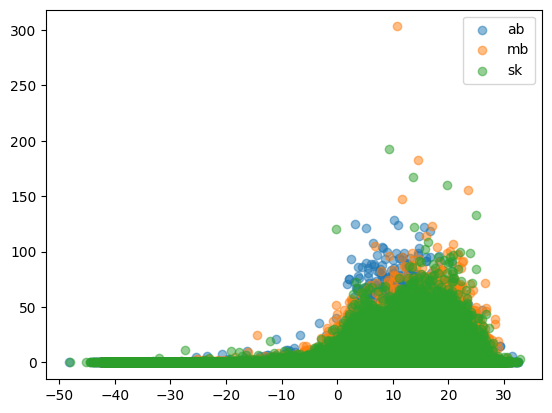

In [24]:
plt.scatter( ab_df['mean_temp'], ab_df['total_rain'], alpha=0.5, label="ab")
plt.scatter( mb_df['mean_temp'], mb_df['total_rain'], alpha=0.5, label="mb")
plt.scatter( sk_df['mean_temp'], sk_df['total_rain'], alpha=0.5, label="sk")
plt.legend(loc="upper right")
plt.show()

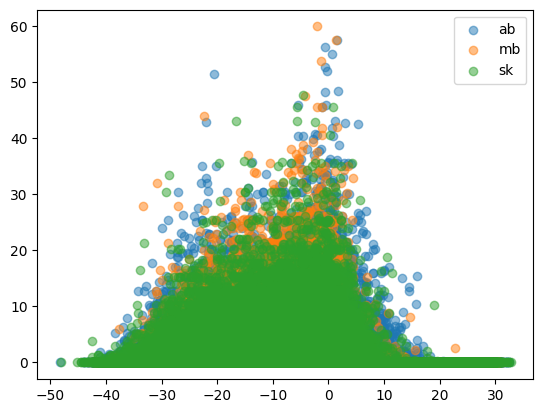

In [25]:
plt.scatter( ab_df['mean_temp'], ab_df['total_snow'], alpha=0.5, label="ab")
plt.scatter( mb_df['mean_temp'], mb_df['total_snow'], alpha=0.5, label="mb")
plt.scatter( sk_df['mean_temp'], sk_df['total_snow'], alpha=0.5, label="sk")
plt.legend(loc="upper right")
plt.show()

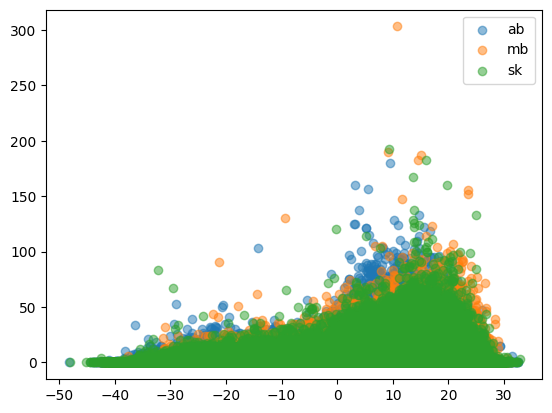

In [26]:
plt.scatter( ab_df['mean_temp'], ab_df['total_precip'], alpha=0.5, label="ab")
plt.scatter( mb_df['mean_temp'], mb_df['total_precip'], alpha=0.5, label="mb")
plt.scatter( sk_df['mean_temp'], sk_df['total_precip'], alpha=0.5, label="sk")
plt.legend(loc="upper right")
plt.show()

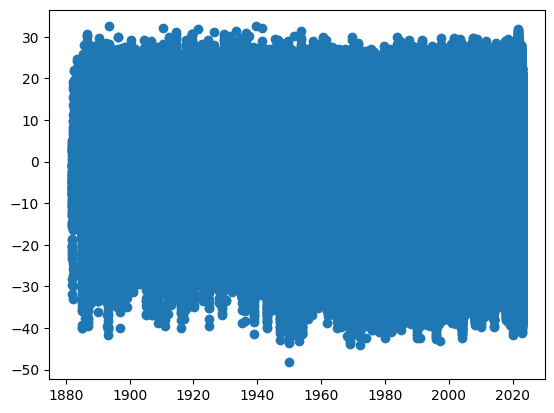

In [11]:
plt.scatter(ab_df['date'], ab_df['mean_temp'])
plt.show()

In [27]:
temp = ab_df[["mean_temp", "total_rain", "total_snow", "total_precip", "snow_on_grnd"]]
temp.corr()

,mean_temp,total_rain,total_snow,total_precip,snow_on_grnd
mean_temp,1.000000,0.100768,-0.134505,0.084138,-0.335861
total_rain,0.100768,1.000000,0.005332,0.612527,-0.037558
total_snow,-0.134505,0.005332,1.000000,0.215216,0.139634
total_precip,0.084138,0.612527,0.215216,1.000000,-0.020806
snow_on_grnd,-0.335861,-0.037558,0.139634,-0.020806,1.000000


In [28]:
temp = mb_df[["mean_temp", "total_rain", "total_snow", "total_precip", "snow_on_grnd"]]
temp.corr()

,mean_temp,total_rain,total_snow,total_precip,snow_on_grnd
mean_temp,1.000000,0.154899,-0.136517,0.139439,-0.468445
total_rain,0.154899,1.000000,-0.016762,0.743323,-0.075020
total_snow,-0.136517,-0.016762,1.000000,0.235997,0.139163
total_precip,0.139439,0.743323,0.235997,1.000000,-0.048439
snow_on_grnd,-0.468445,-0.075020,0.139163,-0.048439,1.000000


In [29]:
temp = sk_df[["mean_temp", "total_rain", "total_snow", "total_precip", "snow_on_grnd"]]
temp.corr()

,mean_temp,total_rain,total_snow,total_precip,snow_on_grnd
mean_temp,1.000000,0.147635,-0.155380,0.115634,-0.431922
total_rain,0.147635,1.000000,-0.013090,0.756479,-0.066634
total_snow,-0.155380,-0.013090,1.000000,0.237813,0.098835
total_precip,0.115634,0.756479,0.237813,1.000000,-0.040945
snow_on_grnd,-0.431922,-0.066634,0.098835,-0.040945,1.000000
